# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
len(cities)

635

In [4]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

carnarvon
bathsheba
hermanus
mataura
cape+town
hanstholm
fort+nelson
yellowknife
port+alfred
gorno-chuyskiy
barentsburg
vaitape
ushuaia
bambous+virieux
kapaa
mazurivka
vaini
collie
high+level
muros
saskylakh
kodiak
celestun
jamestown
bluff
rikitea
zhangjiakou
maragogi
wenling
chuy
beloha
hilo
chokurdakh
lorengau
northam
iberia
edd
pevek
sebinkarahisar
san+patricio
busselton
kuldur
georgetown
hithadhoo
taolanaro
punta+arenas
auki
igarape-miri
masingbi
marcona
lata
tortoli
seoul
tuktoyaktuk
airai
port+blair
aklavik
talnakh
judaberg
ternate
ahipara
meulaboh
saldanha
tasiilaq
albany
bahia+blanca
ngukurr
cap+malheureux
avarua
yuzhno-yeniseyskiy
aranos
kulhudhuffushi
hobart
pleasant+point
coquimbo
vestmanna
saint-philippe
faya
prieska
opuwo
shimoda
ponta+do+sol
cardston
castro
honiara
tsihombe
barrow
xining
sisimiut
arraial+do+cabo
cayenne
qui+nhon
mar+del+plata
andros+town
kazalinsk
salinas
new+norfolk
lashio
bredasdorp
victoria
severo-kurilsk
haines+junction
samarai
astoria
camocim
marzuq


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_data = []

base_url = f'https://api.openweathermap.org/data/2.5/weather?'

counter = 0

for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in carnarvon.
Making request number 2 for current weather data in bathsheba.
Making request number 3 for current weather data in hermanus.
Making request number 4 for current weather data in mataura.
Making request number 5 for current weather data in cape+town.
Making request number 6 for current weather data in hanstholm.
Making request number 7 for current weather data in fort+nelson.
Making request number 8 for current weather data in yellowknife.
Making request number 9 for current weather data in port+alfred.
Making request number 10 for current weather data in gorno-chuyskiy.
Making request number 11 for current weather data in barentsburg.
Making request number 12 for current weather data in vaitape.
Making request number 13 for current weather data in ushuaia.
Making request number 14 for current weather data in bambous+virieux.
Making request number 15 for current weather data in kapaa.
Making request number 16 for current weat

Making request number 130 for current weather data in san+cristobal.
Making request number 131 for current weather data in sitka.
Making request number 132 for current weather data in kargasok.
Making request number 133 for current weather data in amderma.
Making request number 134 for current weather data in bermeo.
Making request number 135 for current weather data in margate.
Making request number 136 for current weather data in casper.
Making request number 137 for current weather data in hasaki.
Making request number 138 for current weather data in mrirt.
Making request number 139 for current weather data in shenzhen.
Making request number 140 for current weather data in geraldton.
Making request number 141 for current weather data in lakatoro.
Making request number 142 for current weather data in namibe.
Making request number 143 for current weather data in campbell+river.
Making request number 144 for current weather data in vila.
Making request number 145 for current weather da

Making request number 257 for current weather data in codrington.
Making request number 258 for current weather data in krasnoselkup.
Making request number 259 for current weather data in mehamn.
Making request number 260 for current weather data in bergerac.
Making request number 261 for current weather data in panalingaan.
Making request number 262 for current weather data in kaohsiung.
Making request number 263 for current weather data in ust-barguzin.
Making request number 264 for current weather data in guangzhou.
Making request number 265 for current weather data in hamilton.
Making request number 266 for current weather data in harper.
Making request number 267 for current weather data in pinsk.
Making request number 268 for current weather data in vostok.
Making request number 269 for current weather data in sao+gabriel+da+cachoeira.
Making request number 270 for current weather data in cururupu.
Making request number 271 for current weather data in longyearbyen.
Making request

Making request number 384 for current weather data in sarny.
Making request number 385 for current weather data in ambad.
Making request number 386 for current weather data in sao+miguel+do+oeste.
Making request number 387 for current weather data in tura.
Making request number 388 for current weather data in sioux+lookout.
Making request number 389 for current weather data in narsaq.
Making request number 390 for current weather data in chara.
Making request number 391 for current weather data in bacolod.
Making request number 392 for current weather data in petersburg.
Making request number 393 for current weather data in saint-francois.
Making request number 394 for current weather data in arnoldstein.
Making request number 395 for current weather data in adra.
Making request number 396 for current weather data in luis+correia.
Making request number 397 for current weather data in nganjuk.
Making request number 398 for current weather data in bajil.
Making request number 399 for cur

Making request number 512 for current weather data in westport.
Making request number 513 for current weather data in huai+thalaeng.
Making request number 514 for current weather data in gladstone.
Making request number 515 for current weather data in makakilo+city.
Making request number 516 for current weather data in salalah.
Making request number 517 for current weather data in ust-kulom.
Making request number 518 for current weather data in chateau-thierry.
Making request number 519 for current weather data in vestmannaeyjar.
Making request number 520 for current weather data in ostrovnoy.
Making request number 521 for current weather data in forbes.
Making request number 522 for current weather data in limbang.
Making request number 523 for current weather data in mandali.
Making request number 524 for current weather data in nuevo+ideal.
Making request number 525 for current weather data in santa+maria.
Making request number 526 for current weather data in khasan.
Making request 

In [6]:
pprint(weather_data)

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -24.8667, 'lon': 113.6333},
  'dt': 1615084549,
  'id': 2074865,
  'main': {'feels_like': 303.41,
           'humidity': 70,
           'pressure': 1010,
           'temp': 302.15,
           'temp_max': 302.15,
           'temp_min': 302.15},
  'name': 'Carnarvon',
  'sys': {'country': 'AU',
          'id': 9505,
          'sunrise': 1615069387,
          'sunset': 1615114216,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 190, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 13.2167, 'lon': -59.5167},
  'dt': 1615084549,
  'id': 3374083,
  'main': {'feels_like': 295.94,
           'humidity': 69,
           'pressure': 1015,
           'temp': 299.15,
           'temp_max': 299.15,
          

           'temp_max': 299.81,
           'temp_min': 299.81},
  'name': 'Rikitea',
  'sys': {'country': 'PF', 'sunrise': 1615042693, 'sunset': 1615087448},
  'timezone': -32400,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 90, 'speed': 5.93}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 40.81, 'lon': 114.8794},
  'dt': 1615084557,
  'id': 2033196,
  'main': {'feels_like': 271.23,
           'grnd_level': 936,
           'humidity': 78,
           'pressure': 1028,
           'sea_level': 1028,
           'temp': 274.29,
           'temp_max': 274.29,
           'temp_min': 274.29},
  'name': 'Zhangjiakou',
  'sys': {'country': 'CN', 'sunrise': 1615070744, 'sunset': 1615112260},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,


  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 29, 'speed': 3.28}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -53.15, 'lon': -70.9167},
  'dt': 1615084342,
  'id': 3874787,
  'main': {'feels_like': 271.74,
           'humidity': 61,
           'pressure': 989,
           'temp': 282.09,
           'temp_max': 282.15,
           'temp_min': 282.04},
  'name': 'Punta Arenas',
  'sys': {'country': 'CL',
          'id': 8487,
          'sunrise': 1615025989,
          'sunset': 1615073412,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 12.35}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'l

          'id': 7271,
          'sunrise': 1615048702,
          'sunset': 1615093343,
          'type': 1},
  'timezone': -36000,
  'visibility': 2300,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'},
              {'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
  'wind': {'deg': 280, 'speed': 6.69}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': -24.1333, 'lon': 19.1167},
  'dt': 1615084570,
  'id': 3358666,
  'main': {'feels_like': 292.18,
           'grnd_level': 886,
           'humidity': 40,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 295.65,
           'temp_max': 295.65,
           'temp_min': 295.65},
  'name': 'Aranos',
  'sys': {'country': 'NA', 'sunrise': 1615092099, 'sunset': 1615136864},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'descr

 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 36.6777, 'lon': -121.6555},
  'dt': 1615084396,
  'id': 5391295,
  'main': {'feels_like': 278.96,
           'humidity': 66,
           'pressure': 1020,
           'temp': 284.08,
           'temp_max': 285.15,
           'temp_min': 283.15},
  'name': 'Salinas',
  'sys': {'country': 'US',
          'id': 5885,
          'sunrise': 1615041004,
          'sunset': 1615082747,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -42.7826, 'lon': 147.0587},
  'dt': 1615084579,
  'id': 2155415,
  'main': {'feels_like': 290.88,
           'humidity': 49,
           'pressure': 1010,
           'temp': 29

  'timezone': -10800,
  'visibility': 1640,
  'weather': [{'description': 'snow',
               'icon': '13n',
               'id': 601,
               'main': 'Snow'}],
  'wind': {'deg': 38, 'speed': 3.79}},
 {'base': 'stations',
  'clouds': {'all': 67},
  'cod': 200,
  'coord': {'lat': 71.9667, 'lon': 102.5},
  'dt': 1615084291,
  'id': 2022572,
  'main': {'feels_like': 238.22,
           'grnd_level': 1003,
           'humidity': 87,
           'pressure': 1006,
           'sea_level': 1006,
           'temp': 245.57,
           'temp_max': 245.57,
           'temp_min': 245.57},
  'name': 'Khatanga',
  'sys': {'country': 'RU', 'sunrise': 1615076182, 'sunset': 1615112764},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 62, 'speed': 5.05}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 55.7435, 'lon

           'humidity': 85,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 298.63,
           'temp_max': 298.63,
           'temp_min': 298.63},
  'name': 'Lakatoro',
  'sys': {'country': 'VU', 'sunrise': 1615056714, 'sunset': 1615101078},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 274, 'speed': 1.97}},
 {'base': 'stations',
  'clouds': {'all': 57},
  'cod': 200,
  'coord': {'lat': -15.1961, 'lon': 12.1522},
  'dt': 1615084592,
  'id': 3347019,
  'main': {'feels_like': 299.49,
           'grnd_level': 1009,
           'humidity': 81,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 296.99,
           'temp_max': 296.99,
           'temp_min': 296.99},
  'name': 'Mossamedes',
  'sys': {'country': 'AO', 'sunrise': 1615094005, 'sunset': 1615138301},
  'timezone': 3600,
  'v

           'temp_max': 293.15,
           'temp_min': 292.04},
  'name': 'Waipawa',
  'sys': {'country': 'NZ',
          'id': 7358,
          'sunrise': 1615053939,
          'sunset': 1615099965,
          'type': 1},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 330, 'gust': 11.32, 'speed': 5.66}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 38.4924, 'lon': 43.3831},
  'dt': 1615084598,
  'id': 298117,
  'main': {'feels_like': 268.72,
           'humidity': 69,
           'pressure': 1020,
           'temp': 272.15,
           'temp_max': 272.15,
           'temp_min': 272.15},
  'name': 'Van',
  'sys': {'country': 'TR',
          'id': 6998,
          'sunrise': 1615087807,
          'sunset': 1615129510,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'descripti

  'coord': {'lat': 5.5167, 'lon': 5.75},
  'dt': 1615084606,
  'id': 2319133,
  'main': {'feels_like': 304.08,
           'grnd_level': 1009,
           'humidity': 89,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 299.24,
           'temp_max': 299.24,
           'temp_min': 299.24},
  'name': 'Warri',
  'sys': {'country': 'NG', 'sunrise': 1615096009, 'sunset': 1615139369},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 229, 'speed': 1.5}},
 {'base': 'stations',
  'clouds': {'all': 60},
  'cod': 200,
  'coord': {'lat': -9.8, 'lon': -139.0333},
  'dt': 1615084607,
  'id': 4020109,
  'main': {'feels_like': 299.61,
           'grnd_level': 1001,
           'humidity': 74,
           'pressure': 1009,
           'sea_level': 1009,
           'temp': 299.6,
           'temp_max': 299.6,
           'temp_min':

  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 195, 'speed': 0.48}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -30.72, 'lon': 25.0972},
  'dt': 1615084619,
  'id': 1013076,
  'main': {'feels_like': 283.46,
           'grnd_level': 863,
           'humidity': 36,
           'pressure': 1014,
           'sea_level': 1014,
           'temp': 286.63,
           'temp_max': 286.63,
           'temp_min': 286.63},
  'name': 'Colesberg',
  'sys': {'country': 'ZA', 'sunrise': 1615090466, 'sunset': 1615135627},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 229, 'speed': 1.43}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': 54.4333, 'l

  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 330, 'speed': 1.04}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 51.8535, 'lon': 104.8693},
  'dt': 1615084628,
  'id': 2020744,
  'main': {'feels_like': 258.28,
           'humidity': 57,
           'pressure': 1014,
           'temp': 265.15,
           'temp_max': 265.15,
           'temp_min': 265.15},
  'name': 'Listvyanka',
  'sys': {'country': 'RU',
          'id': 8891,
          'sunrise': 1615073609,
          'sunset': 1615114199,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 150, 'speed': 5}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 

          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 190, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 20.6667, 'lon': -103.3333},
  'dt': 1615084638,
  'id': 4005539,
  'main': {'feels_like': 293.89,
           'humidity': 15,
           'pressure': 1018,
           'temp': 297.8,
           'temp_max': 298.15,
           'temp_min': 297.59},
  'name': 'Guadalajara',
  'sys': {'country': 'MX',
          'id': 7128,
          'sunrise': 1615036162,
          'sunset': 1615078796,
          'type': 1},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 250, 'speed': 2.06}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod'

  'cod': 200,
  'coord': {'lat': 1.8911, 'lon': 33.9661},
  'dt': 1615084648,
  'id': 231947,
  'main': {'feels_like': 294.03,
           'grnd_level': 889,
           'humidity': 83,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 292.32,
           'temp_max': 292.32,
           'temp_min': 292.32},
  'name': 'Katakwi',
  'sys': {'country': 'UG', 'sunrise': 1615089160, 'sunset': 1615132677},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 229, 'speed': 0.51}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 3},
  'cod': 200,
  'coord': {'lat': 28.7167, 'lon': -111.5833},
  'dt': 1615084649,
  'id': 3991622,
  'main': {'feels_like': 291.54,
           'humidity': 30,
           'pressure': 1006,
           'temp': 294.31,
           'temp_max': 295.37,
           'temp_

           'temp': 294.14,
           'temp_max': 294.82,
           'temp_min': 293.15},
  'name': 'Christchurch',
  'sys': {'country': 'NZ',
          'id': 7348,
          'sunrise': 1615054534,
          'sunset': 1615100754,
          'type': 1},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 160, 'speed': 6.17}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 70.4692, 'lon': -68.5914},
  'dt': 1615084657,
  'id': 5924351,
  'main': {'feels_like': 239.42,
           'humidity': 69,
           'pressure': 1026,
           'temp': 246.15,
           'temp_max': 246.15,
           'temp_min': 246.15},
  'name': 'Clyde River',
  'sys': {'country': 'CA',
          'id': 776,
          'sunrise': 1615030712,
          'sunset': 1615067573,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'w

          'sunrise': 1615024181,
          'sunset': 1615069708,
          'type': 3},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 42, 'speed': 3.46}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 54.3161, 'lon': -130.3201},
  'dt': 1615084666,
  'id': 6113406,
  'main': {'feels_like': 274.51,
           'humidity': 61,
           'pressure': 1004,
           'temp': 279.15,
           'temp_max': 279.15,
           'temp_min': 279.15},
  'name': 'Prince Rupert',
  'sys': {'country': 'CA',
          'id': 883,
          'sunrise': 1615043840,
          'sunset': 1615084070,
          'type': 1},
  'timezone': -28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 110, 's

  'main': {'feels_like': 304.81,
           'humidity': 83,
           'pressure': 1013,
           'temp': 300.15,
           'temp_max': 300.15,
           'temp_min': 300.15},
  'name': 'Pontianak',
  'sys': {'country': 'ID',
          'id': 9421,
          'sunrise': 1615071032,
          'sunset': 1615114634,
          'type': 1},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all': 59},
  'cod': 200,
  'coord': {'lat': 51.338, 'lon': 26.6019},
  'dt': 1615084678,
  'id': 694792,
  'main': {'feels_like': 264.41,
           'grnd_level': 999,
           'humidity': 89,
           'pressure': 1019,
           'sea_level': 1019,
           'temp': 272,
           'temp_max': 272,
           'temp_min': 272},
  'name': 'Sarny',
  'sys': {'country': 'UA', 'sunrise': 1615092339

           'temp': 298.15,
           'temp_max': 298.15,
           'temp_min': 298.15},
  'name': 'Conceição do Araguaia',
  'sys': {'country': 'BR',
          'id': 8301,
          'sunrise': 1615022509,
          'sunset': 1615066501,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 2.57}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 41.3712, 'lon': -73.414},
  'dt': 1615084687,
  'id': 5282297,
  'main': {'feels_like': 263.22,
           'humidity': 43,
           'pressure': 1022,
           'temp': 268.41,
           'temp_max': 270.15,
           'temp_min': 266.48},
  'name': 'Bethel',
  'sys': {'country': 'US',
          'id': 3888,
          'sunrise': 1615029601,
          'sunset': 1615070999,
          'type': 1}

               'main': 'Clear'}],
  'wind': {'deg': 40, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 57.8, 'lon': 158.6667},
  'dt': 1615084697,
  'id': 2120612,
  'main': {'feels_like': 242.26,
           'grnd_level': 991,
           'humidity': 87,
           'pressure': 1000,
           'sea_level': 1000,
           'temp': 248.58,
           'temp_max': 248.58,
           'temp_min': 248.58},
  'name': "Tigil'",
  'sys': {'country': 'RU', 'sunrise': 1615061076, 'sunset': 1615100915},
  'timezone': 43200,
  'visibility': 6198,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 318, 'speed': 3.66}},
 {'base': 'stations',
  'clouds': {'all': 54},
  'cod': 200,
  'coord': {'lat': -46.2817, 'lon': 169.8464},
  'dt': 1615084697,
  'id': 2208248,
  'main': {'feels_like': 282.34,
           'humidity': 53,
           'pressure': 993

           'temp': 299.19,
           'temp_max': 299.19,
           'temp_min': 299.19},
  'name': 'Wanning',
  'sys': {'country': 'CN', 'sunrise': 1615071202, 'sunset': 1615113954},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 97, 'speed': 3.53}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': -8.103, 'lon': 156.8419},
  'dt': 1615084706,
  'id': 2108857,
  'main': {'feels_like': 305.5,
           'grnd_level': 1006,
           'humidity': 70,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 302.06,
           'temp_max': 302.06,
           'temp_min': 302.06},
  'name': 'Gizo Government Station',
  'rain': {'1h': 0.72},
  'sys': {'country': 'SB', 'sunrise': 1615059447, 'sunset': 1615103419},
  'timezone': 39600,
  'visibilit

           'humidity': 90,
           'pressure': 1021,
           'sea_level': 1021,
           'temp': 262.82,
           'temp_max': 262.82,
           'temp_min': 262.82},
  'name': 'Kurumkan',
  'sys': {'country': 'RU', 'sunrise': 1615072441, 'sunset': 1615112761},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 76, 'speed': 0.84}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 63.0128, 'lon': 112.4714},
  'dt': 1615084716,
  'id': 2025456,
  'main': {'feels_like': 257.5,
           'grnd_level': 960,
           'humidity': 97,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 262.3,
           'temp_max': 262.3,
           'temp_min': 262.3},
  'name': 'Chernyshevskiy',
  'sys': {'country': 'RU', 'sunrise': 1615072561, 'sunset': 1615111600},
  'timezone': 32400,
  'vis

  'sys': {'country': 'RO',
          'id': 2033571,
          'sunrise': 1615092166,
          'sunset': 1615133301,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 246, 'speed': 2.4}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 16.2923, 'lon': 119.8062},
  'dt': 1615084724,
  'id': 1717787,
  'main': {'feels_like': 302.85,
           'grnd_level': 999,
           'humidity': 67,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 300.99,
           'temp_max': 300.99,
           'temp_min': 300.99},
  'name': 'Catuday',
  'sys': {'country': 'PH', 'sunrise': 1615068886, 'sunset': 1615111754},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main

           'temp': 295.35,
           'temp_max': 295.35,
           'temp_min': 295.35},
  'name': 'Entre Rios',
  'sys': {'country': 'BR', 'sunrise': 1615019735, 'sunset': 1615063909},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 56, 'speed': 1.99}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 37.8792, 'lon': 114.6517},
  'dt': 1615084733,
  'id': 1802204,
  'main': {'feels_like': 271.25,
           'humidity': 48,
           'pressure': 1032,
           'temp': 276.15,
           'temp_max': 276.15,
           'temp_min': 276.15},
  'name': 'Luancheng',
  'sys': {'country': 'CN',
          'id': 9615,
          'sunrise': 1615070700,
          'sunset': 1615112414,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d'

           'pressure': 1014,
           'sea_level': 1014,
           'temp': 299.64,
           'temp_max': 299.64,
           'temp_min': 299.64},
  'name': 'Amarkantak',
  'sys': {'country': 'IN', 'sunrise': 1615078166, 'sunset': 1615120738},
  'timezone': 19800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 190, 'speed': 1.36}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 13.3068, 'lon': 123.3425},
  'dt': 1615084740,
  'id': 1722803,
  'main': {'feels_like': 304.58,
           'grnd_level': 1014,
           'humidity': 52,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 302.84,
           'temp_max': 302.84,
           'temp_min': 302.84},
  'name': 'Buluang',
  'sys': {'country': 'PH', 'sunrise': 1615067969, 'sunset': 1615110974},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{

  'main': {'feels_like': 301.88,
           'grnd_level': 1010,
           'humidity': 86,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 298.47,
           'temp_max': 298.47,
           'temp_min': 298.47},
  'name': 'Tabou',
  'sys': {'country': 'CI', 'sunrise': 1615099129, 'sunset': 1615142537},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 261, 'speed': 2.47}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -0.8833, 'lon': 131.25},
  'dt': 1615084750,
  'id': 1626542,
  'main': {'feels_like': 302.89,
           'grnd_level': 1011,
           'humidity': 72,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 301.56,
           'temp_max': 301.56,
           'temp_min': 301.56},
  'name': 'Sorong',
  'rain': {'1h': 4.211},
  'sys': {'country':

  'main': {'feels_like': 299.01,
           'humidity': 94,
           'pressure': 1011,
           'temp': 298.15,
           'temp_max': 298.15,
           'temp_min': 298.15},
  'name': 'Sola',
  'sys': {'country': 'VU',
          'id': 7307,
          'sunrise': 1615056737,
          'sunset': 1615100990,
          'type': 1},
  'timezone': 39600,
  'visibility': 9000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 243, 'speed': 7.06}},
 {'base': 'stations',
  'clouds': {'all': 96},
  'cod': 200,
  'coord': {'lat': 37.4725, 'lon': -4.4421},
  'dt': 1615084758,
  'id': 2520645,
  'main': {'feels_like': 284.06,
           'humidity': 77,
           'pressure': 1016,
           'temp': 284.82,
           'temp_max': 284.82,
           'temp_min': 284.82},
  'name': 'Cabra',
  'sys': {'country': 'ES',
          'id': 2008401,
          'sunrise': 1615099241,
          'sunset'

 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 41.4517, 'lon': -82.0354},
  'dt': 1615084732,
  'id': 5146277,
  'main': {'feels_like': 266.72,
           'humidity': 68,
           'pressure': 1024,
           'temp': 270.66,
           'temp_max': 272.59,
           'temp_min': 269.15},
  'name': 'Avon',
  'sys': {'country': 'US',
          'id': 3646,
          'sunrise': 1615031671,
          'sunset': 1615073066,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 150, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 1.6481, 'lon': 14.5806},
  'dt': 1615084765,
  'id': 2255304,
  'main': {'feels_like': 297.5,
           'grnd_level': 963,
           'humidity': 87,
           'pressure': 1010,
           'sea_level': 1010,
           'tem

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# empty lists to store values
name_list = []
country_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use a counter to index into appropriate dictionary within weather_data
line_tracker = 0

# create (to be used later) function to convert from kelvin to fahrenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        country = weather_data[line_tracker]['sys']['country']
        country_list.append(country)  
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1    


In [8]:
weather_df = pd.DataFrame(list(zip(name_list, country_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Country', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Carnarvon,AU,-24.8667,113.6333,84.470,5.66,0,70
1,Bathsheba,BB,13.2167,-59.5167,79.070,9.77,20,69
2,Hermanus,ZA,-34.4187,19.2345,63.266,0.89,3,84
3,Mataura,NZ,-46.1927,168.8643,53.276,8.49,56,76
4,Cape Town,ZA,-33.9258,18.4232,66.272,1.54,75,88
...,...,...,...,...,...,...,...,...
572,Abonnema,NG,4.7084,6.7931,80.870,1.44,20,89
573,Tadine,NC,-21.5500,167.8833,79.052,5.84,10,66
574,Castro Alves,BR,-12.7656,-39.4283,71.294,1.63,5,91
575,Sterling,US,39.0062,-77.4286,36.266,3.09,1,48


In [9]:
# save weather_df to csv file
weather_df.to_csv('weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [12]:
# ^^^no cities are above 100% humidity, so we skip the rest of this section

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

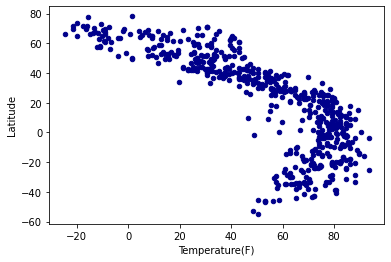

In [35]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='DarkBlue')

plt.savefig('lat_v_temp.png')

In [14]:
# In the above cell, each city is plotted according to it's latitude and temperature in Fahrenheit.

## Latitude vs. Humidity Plot

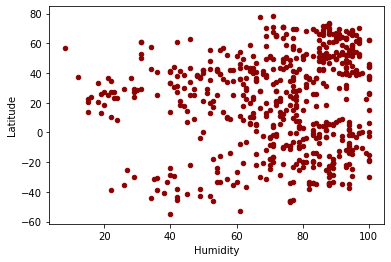

In [36]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='DarkRed')
plt.savefig('lat_v_humidity.png')

In [16]:
# In the above cell, each city is plotted according to it's latitude and humidity percentage.

## Latitude vs. Cloudiness Plot

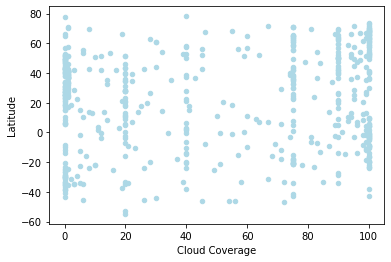

In [37]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='LightBlue')
plt.savefig('lat_v_cloud.png')

In [18]:
# In the above cell, each city is plotted according to it's latitude and cloud coverage percentage.

## Latitude vs. Wind Speed Plot

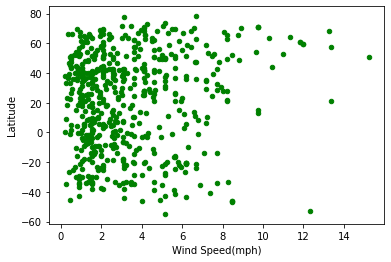

In [38]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='Green')
plt.savefig('lat_v_wind.png')

In [20]:
# In the above cell, each city is plotted according to it's latitude and wind speed(mph).

## Linear Regression

In [21]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

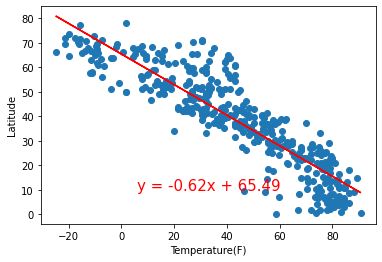

<Figure size 432x288 with 0 Axes>

In [39]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_temp_regression.png')

In [23]:
# In the northern hemisphere, there is a strong correlation between temperature and latitude. As we get closer to the equator, the temperature rises. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

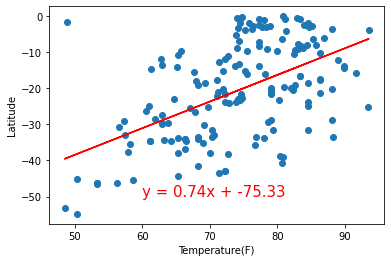

<Figure size 432x288 with 0 Axes>

In [40]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_temp_regression.png')

In [25]:
# In the southern hemisphere, the data is less streamlined. However, there is still a slight correlation between latitude and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

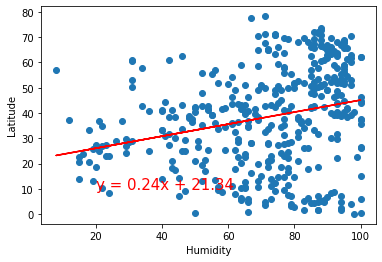

<Figure size 432x288 with 0 Axes>

In [41]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_humidity_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

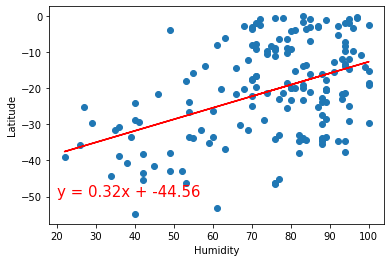

<Figure size 432x288 with 0 Axes>

In [42]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_humidity_regression.png')

In [28]:
# In both the northern and southern hemispheres, we can see that humidity has little to do with latitude placement.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

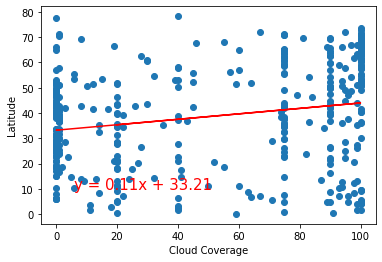

<Figure size 432x288 with 0 Axes>

In [43]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_cloud_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

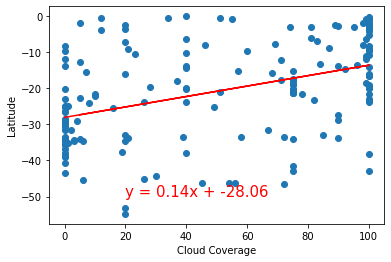

<Figure size 432x288 with 0 Axes>

In [44]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_cloud_regression.png')

In [31]:
# Again, in both the northern and southern hemispheres, we can see that cloudiness has little to do with latitude placement.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

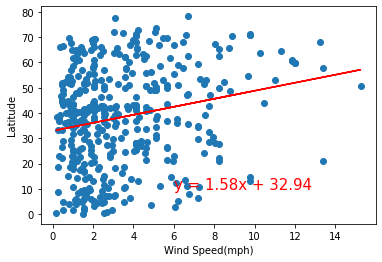

<Figure size 432x288 with 0 Axes>

In [45]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_wind_regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

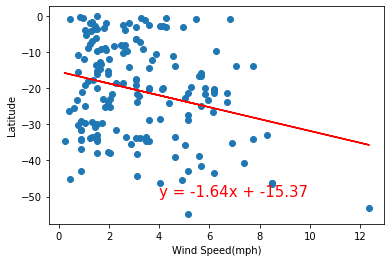

<Figure size 432x288 with 0 Axes>

In [46]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-50),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_wind_regression.png')

In [34]:
# Again, in both the northern and southern hemispheres, we can see that wind speed has little to do with latitude placement.